In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import seaborn 
import peakutils
import wfdb
import pywt
import scipy.signal as signal

In [3]:
#Path of dataset on local machine
dataPath = '/Users/oobiri/Documents/Carleton/AFDetect/data/ltaf/'

In [4]:
# Function that gets all patient Ids from the dataset
def get_ids(filePath):
    patientIds = []
    
    for filename in listdir(filePath):
        if filename.endswith(".dat") and '04936' not in filename and '05091' not in filename:
            newName = filename.replace('.dat','')
            patientIds.append(newName)
        else:
            continue
        
    return patientIds

In [5]:
pIds = get_ids(dataPath)

In [6]:
print(pIds)

['207', '58', '64', '70', '71', '65', '206', '204', '72', '205', '201', '62', '200', '202', '75', '49', '48', '74', '60', '203', '07', '13', '112', '113', '12', '06', '38', '10', '111', '105', '104', '110', '05', '11', '39', '15', '01', '114', '100', '101', '115', '28', '00', '16', '103', '117', '116', '102', '17', '03', '26', '32', '33', '19', '25', '118', '119', '24', '30', '18', '34', '20', '08', '121', '120', '21', '35', '23', '37', '122', '22', '45', '51', '44', '47', '53', '208', '43', '42', '56', '54', '68', '69', '55']


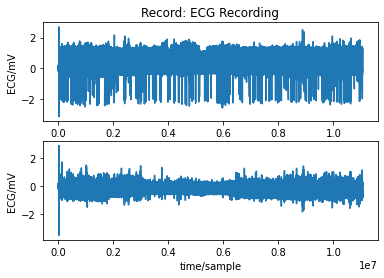

In [34]:
# Load channel
patient1_ECG = wfdb.rdrecord(dataPath + pIds[1])
wfdb.plot_wfdb(record=patient1_ECG, title="Record: ECG Recording")

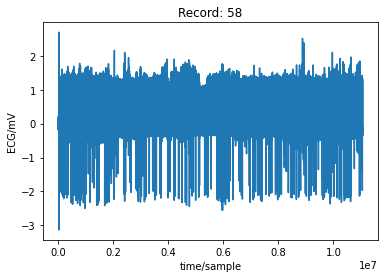

In [35]:
lead1_record = wfdb.rdrecord(dataPath + pIds[1], channels=[0])
wfdb.plot_wfdb(record=lead1_record)

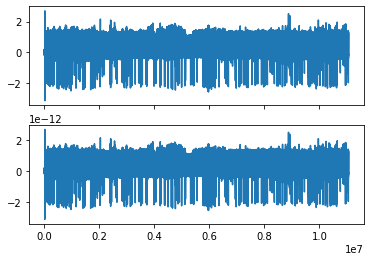

In [36]:
fig, ax = plt.subplots(2, sharex=True)

#butterworth filter
lowpass = 100 
highpass = 0.01

a, b = signal.butter(6, (highpass, lowpass), btype='bandpass', analog=True)
filteredSignal = signal.lfilter(b, a, lead1_record.p_signal)

ax[0].plot(lead1_record.p_signal)
ax[1].plot(filteredSignal)

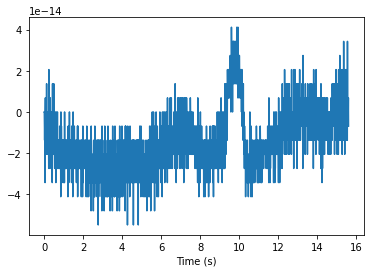

In [42]:
data = filteredSignal
numSamps = 2000

times = np.arange(numSamps, dtype = 'float') / lead1_record.fs

plt.plot(times, data[: numSamps])
plt.xlabel('Time (s)')
plt.show()

In [ ]:
data = lead1_record
numSamps = 2000

times = np.arange(numSamps, dtype = 'float') / lead1_record.fs

plt.plot(times, data[: numSamps])
plt.xlabel('Time (s)')
plt.show()

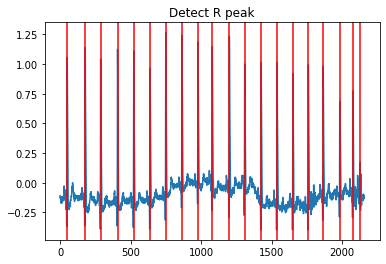

In [43]:
# R Peak
signalSlice = np.ndarray.flatten(lead1_record.p_signal[28761:30921])

peakIndex = peakutils.indexes(signalSlice, thres=0.3, min_dist = 50)

fig, ax = plt.subplots()

ax.set_title('Detect R peak')
ax.plot(signalSlice)

for peak in peakIndex:
    ax.axvline(x = peak, color='r')

<function matplotlib.pyplot.show(close=None, block=None)>

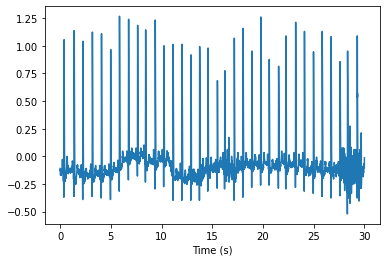

In [46]:
x = 28761 
y = 32601
dataSlice = np.ndarray.flatten(lead1_record.p_signal[x:y])
numSamps = y-x
times = (np.arange(numSamps, dtype = 'float') / lead1_record.fs) 

plt.plot(times, dataSlice)
plt.xlabel('Time (s)')
plt.show